# Field operations 1

In this tutorial, we show some mathematical operations that can be performed on field objects in Ubermag. Fot that, we are going to use a skyrmion example.

Running OOMMF (ExeOOMMFRunner) [2021/01/04 11:20]... (0.9 s)


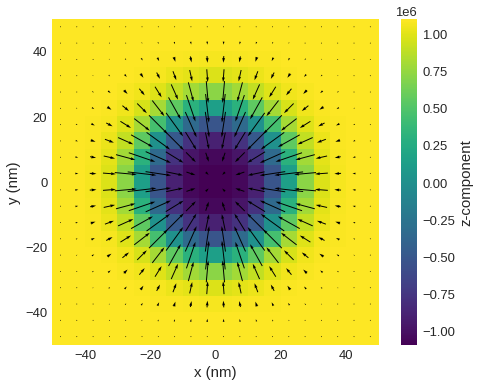

In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), bc='xy')

system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.2e6, u=(0, 0, 1)) 
               + mm.Zeeman(H=(0, 0, 1e5)))

def m_init(point):
    x, y, z = point
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

system.m = df.Field(mesh, dim=3, value=m_init, norm=1.1e6)

# minimize the energy
md = mc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

The magnetisation field is in `system.m`. To access a numpy array of a magnetisation field:

In [2]:
system.m.array

array([[[[   1577.02187148,    1577.02187148, 1099997.73909042],
         [   1577.02187148,    1577.02187148, 1099997.73909042]],

        [[   2131.76340308,    4844.39135015, 1099987.26695232],
         [   2131.76340308,    4844.39135015, 1099987.26695232]],

        [[   3355.14454314,    8389.23388145, 1099962.89199226],
         [   3355.14454314,    8389.23388145, 1099962.89199226]],

        ...,

        [[   3355.14454314,   -8389.23388145, 1099962.89199226],
         [   3355.14454314,   -8389.23388145, 1099962.89199226]],

        [[   2131.76340308,   -4844.39135015, 1099987.26695232],
         [   2131.76340308,   -4844.39135015, 1099987.26695232]],

        [[   1577.02187148,   -1577.02187148, 1099997.73909042],
         [   1577.02187148,   -1577.02187148, 1099997.73909042]]],


       [[[   4844.39135015,    2131.76340308, 1099987.26695232],
         [   4844.39135015,    2131.76340308, 1099987.26695232]],

        [[   6624.80399474,    6624.80399474, 1099960.101069

This exposes the field to `numpy` and all operations present in numpy can be used. However, there are a lot of convenience functions, which are part of the `Field` object.

To get an individual component:

In [3]:
system.m.x

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

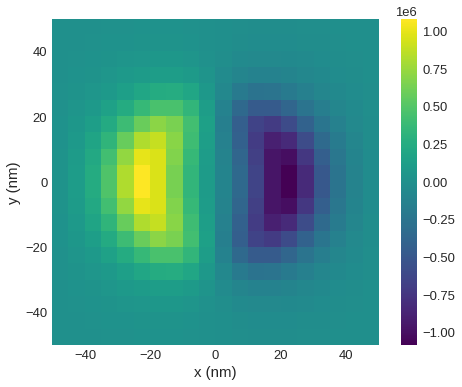

In [4]:
system.m.x.plane('z').mpl()

In [5]:
system.m.y

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

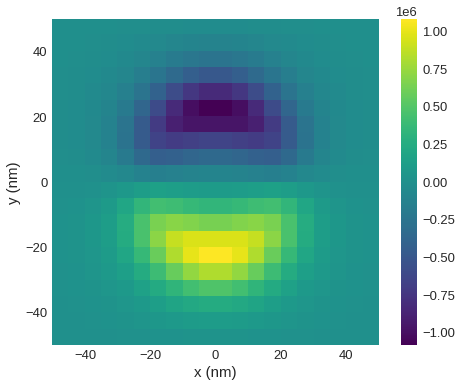

In [6]:
system.m.y.plane('z').mpl()

In [7]:
system.m.z

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

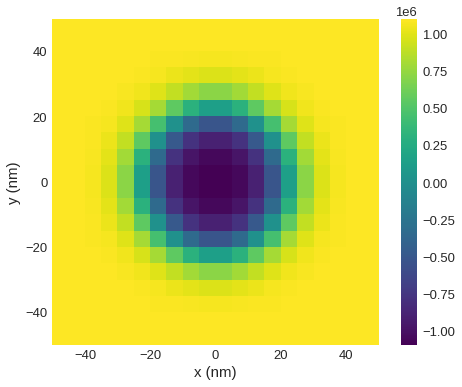

In [8]:
system.m.z.plane('z').mpl()

The magnetisation is by default not normalised.

In [9]:
system.m.average

(-9.35290245251963e-11, 5.183551365917083e-12, 750239.400026488)

To get normalised magnetisation:

$$\mathbf{m} = \frac{\mathbf{M}}{M_\text{s}}$$

In [10]:
system.m.orientation

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=3)

In [11]:
system.m.orientation.average

(-5.702903427273753e-19, -1.5579985218616698e-18, 0.6820358182059002)

Just like we can get the normalised magnetisation, we can get the norm itself.

In [12]:
abs(system.m)

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

## Algebra operations

Let us define two fields:

In [13]:
region = df.Region(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9))
mesh = df.Mesh(region=region, n=(10, 10, 10))

f1 = df.Field(mesh, dim=3, value=(1, 1, 0))
f2 = df.Field(mesh, dim=3, value=(2, 1, 3))

In [14]:
f1.average

(1.0, 1.0, 0.0)

In [15]:
f2.average

(2.0, 1.0, 3.0)

### `+` operation

In [16]:
f1 + f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

In [17]:
(f1 + f2).average

(3.0, 2.0, 3.0)

### `-` operation

In [18]:
f1 - f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

In [19]:
(f1 - f2).average

(-1.0, 0.0, -3.0)

### `*` operation

Basic multiplication is not defined between vector fields. In that case, we perform either dot or cross product, which we are going to discuss later.

In [20]:
# NBVAL_SKIP
f1 * f2  # both are vector fields

ValueError: Cannot apply operator * on self.dim=3 and other.dim=3 fields.

Scalar with vector field:

In [21]:
f1.x * f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

Scalar with vector field:

In [22]:
f1.x * f2.y

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### `/` operation

In [23]:
# NBVAL_SKIP
f1 / f2  # both are vector fields

ValueError: Cannot apply ** operator on self.dim=3 field.

Dividing vector field by a scalar field:

In [24]:
f1 / f2.x

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

Scalar field divided by vector field is not allowed:

In [25]:
# NBVAL_SKIP
f2.x / f1

ValueError: Cannot apply ** operator on self.dim=3 field.

### `**` operator

This operator is allowed only on scalar fields:

In [26]:
# NBVAL_SKIP
f1 ** 2

ValueError: Cannot apply ** operator on self.dim=3 field.

In [27]:
f1.x ** 2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### Compund operations

In [28]:
f1 += f2

In [29]:
f1 -= f2

In [30]:
f1 *= f2.x

In [31]:
f2 /= f2.y

## Vector products

As the title says, these products are applied between vector fields only.

### Dot product

Dot product is implemented through `@` operator:

In [32]:
f1 @ f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### Cross product

Cross product between vector fields is performed using `&` operator:

In [33]:
f1 & f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

## Vector calculus

### Directional derivative $\left(\frac{\partial}{\partial x_{i}}f\right)$

Defined on both scalar and vector fields:

In [34]:
f1.derivative('x')

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

### Gradient $(\nabla f)$

Defined on scalar fields:

In [35]:
f1.x.grad

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

### Divergence $(\nabla \cdot f)$

Defined on vector fields:

In [36]:
f1.div

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### Curl  $(\nabla \times f)$

Defined on vector fields:

In [37]:
f1.curl

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

### Laplace operator $(\nabla^{2} f)$

Defined on both vector and scalar fields:

In [38]:
f1.laplace

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

In [39]:
f1.x.laplace

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

## Integrals

### Volume integral $\left(\int_{V}fdV\right)$

In [40]:
df.integral(f1 * df.dV)

(1.999999999999995e-24, 1.999999999999995e-24, 0.0)

### Surface integral

In order to compute a surface integral, we have to define the surface (`plane`):

In [41]:
df.integral(f1.plane('z') * abs(df.dS))

(2.0000000000000027e-16, 2.0000000000000027e-16, 0.0)

## Operation pipelines

In [42]:
df.integral(f1.x.grad.div.grad.curl.y.grad * df.dV)

(0.0, 0.0, 0.0)

## Example

Here we implement skyrmion number calculations using operations on fields:

$$S = \frac{1}{4\pi} \int \mathbf{m} \cdot \left(\frac{\partial \mathbf{m}}{\partial x} \times \frac{\partial \mathbf{m}}{\partial y}\right) dxdy$$

In [43]:
import math

m = system.m.orientation.plane('z')
S = df.integral(m @ (m.derivative('x') & m.derivative('y')) * df.dx*df.dy) / (4*math.pi)
S

-0.9244762913641907

Or using Ubermag function:

In [44]:
import discretisedfield.tools as dft
dft.topological_charge(m)

-0.9244762913641908

Using Berg-Luescher method

In [45]:
dft.topological_charge(m, method='berg-luescher')

-0.9997455664834572